# Using GeoJSON
Example notebook showing some of the uses of SPC & WPC GeoJSON files in python. <br>
Author: Da'Vel Johnson

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

main_path = os.path.dirname(os.path.abspath("__file__"))

### Example SPC Outlook from the March 31st Tornado Outbreak

<a href="https://en.wikipedia.org/wiki/Tornado_outbreak_of_March_31_%E2%80%93_April_1,_2023" title="Wikipedia Pge">Summary Page</a>

In [2]:
# Load the GeoJSON file
url = "https://www.spc.noaa.gov/products/outlook/archive/2023/day1otlk_20230331_1630_cat.lyr.geojson"
gdf = gpd.read_file(url)

In [3]:
# Inspecting the unique values in the 'LABEL' column to understand the category labels
unique_categories = gdf['LABEL'].unique()
unique_categories.tolist()

['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT', 'HIGH']

In [4]:
# Load a simple map of the United States

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world.name == "United States of America"]

C:\Users\u2rac\AppData\Local\Temp\ipykernel_25820\1208495481.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [5]:
# Define the boundaries for CONUS (approximate values)
minx, miny = -125, 24
maxx, maxy = -66, 50

<Figure size 1500x1000 with 0 Axes>

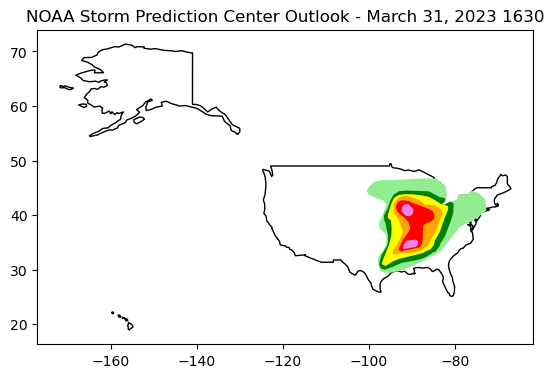

In [6]:
# Define a color map for the categories with labels from the data
category_colors = {
    'TSTM': 'lightgreen',  # General Thunderstorm
    'MRGL': 'green',      # Marginal
    'SLGT': 'yellow',      # Slight
    'ENH': 'orange',           # Enhanced
    'MDT': 'red',           # Moderate
    'HIGH': 'violet'           # High
}

# Filter the GeoDataFrame for CONUS
gdf_conus = gdf.cx[minx:maxx, miny:maxy]

# Plot the US map
plt.figure(figsize=(15, 10))
ax = usa.plot(color='white', edgecolor='black')

# Plot each category with the defined color and order
for category in unique_categories:
    gdf_cat = gdf_conus[gdf_conus['LABEL'] == category]
    gdf_cat.plot(ax=ax, color=category_colors[category], label=category)

# Set plot title and legend
plt.title('NOAA Storm Prediction Center Outlook - March 31, 2023 1630')

plt.show()

## Storm Prediction Center Outlook with states shapefile

<Figure size 1500x1000 with 0 Axes>

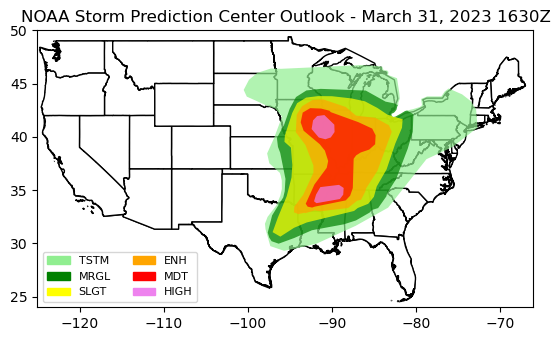

In [7]:
import matplotlib.patches as mpatches

# Plot the US map focusing on CONUS
plt.figure(figsize=(15, 10))
ax = usa.plot(color='white', edgecolor='black')

# Set the limits to focus on the contiguous US
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


# Load in state shapefile
states_shp = main_path + '/shapefiles/states'
states_gdf = gpd.read_file(states_shp)

# Plot the states
states_gdf.plot(ax=ax, color='white', edgecolor='black')

# Set transparency level
alpha_level = 0.7  # Adjust this value as needed

# Plot each category with the defined color
for category in unique_categories:
    gdf_cat = gdf_conus[gdf_conus['LABEL'] == category]
    gdf_cat.plot(ax=ax, color=category_colors[category], alpha=alpha_level, label=category)

# Set plot title and legend
plt.title('NOAA Storm Prediction Center Outlook - March 31, 2023 1630Z')

patchList = []
for key in category_colors:
        data_key = mpatches.Patch(color=category_colors[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, loc = 'lower left', ncol=2, prop = { "size": 8 })
plt.show()

## Checking to see if a city is under a severe risk

In [8]:
from shapely.geometry import Point
from geopy.geocoders import Nominatim

useragent = 'myapplication'
cityname = 'Davenport'

#Finding the city latitude and longitude
geolocator = Nominatim(user_agent=useragent)
location = geolocator.geocode(cityname)
print(location.address)
print("Latitude:",location.latitude,"Longitude:", location.longitude)

# Define the location the city of interest
city_coords = (location.longitude, location.latitude)  # Longitude, Latitude
city_point = Point(city_coords)

cat=[]

#Define category names
category_names = {
    'TSTM': 'General Thunderstorm',  
    'MRGL': 'Marginal',   
    'SLGT': 'Slight',     
    'ENH': 'Enhanced',    
    'MDT': 'Moderate', 
    'HIGH': 'High'
}

# Check if the city is within any of the SPC risk areas
for category in unique_categories:
    is_in_risk = gdf_conus[gdf_conus['LABEL'] == category].contains(city_point).any()
    if is_in_risk == True:
        cat.append(category)

# Result
#is_in_risk

if cat != [] and cat[-1] != 'TSTM':
    print(cityname, "is under a", category_names[cat[-1]], "risk")
elif cat[-1] == 'TSTM':
    print(cityname, "is under a general thunderstorm risk")
else:
    print(cityname, "is not under a severe risk")


Davenport, Scott County, Iowa, United States
Latitude: 41.5235808 Longitude: -90.5770967
Davenport is under a High risk


### Interactive Sereve Weather Outlook

In [9]:
# Transform to a projected CRS Popular Visualisation / Mercator
gdf_projected = gdf.to_crs('epsg:3785')  

# Calculate the area in square meters
gdf_projected["area"] = gdf_projected.area
gdf_projected.explore("area", legend=False,
            style_kwds={'fillColor': 'none',  # No fill color
                        'color': 'black'})    # Outline color

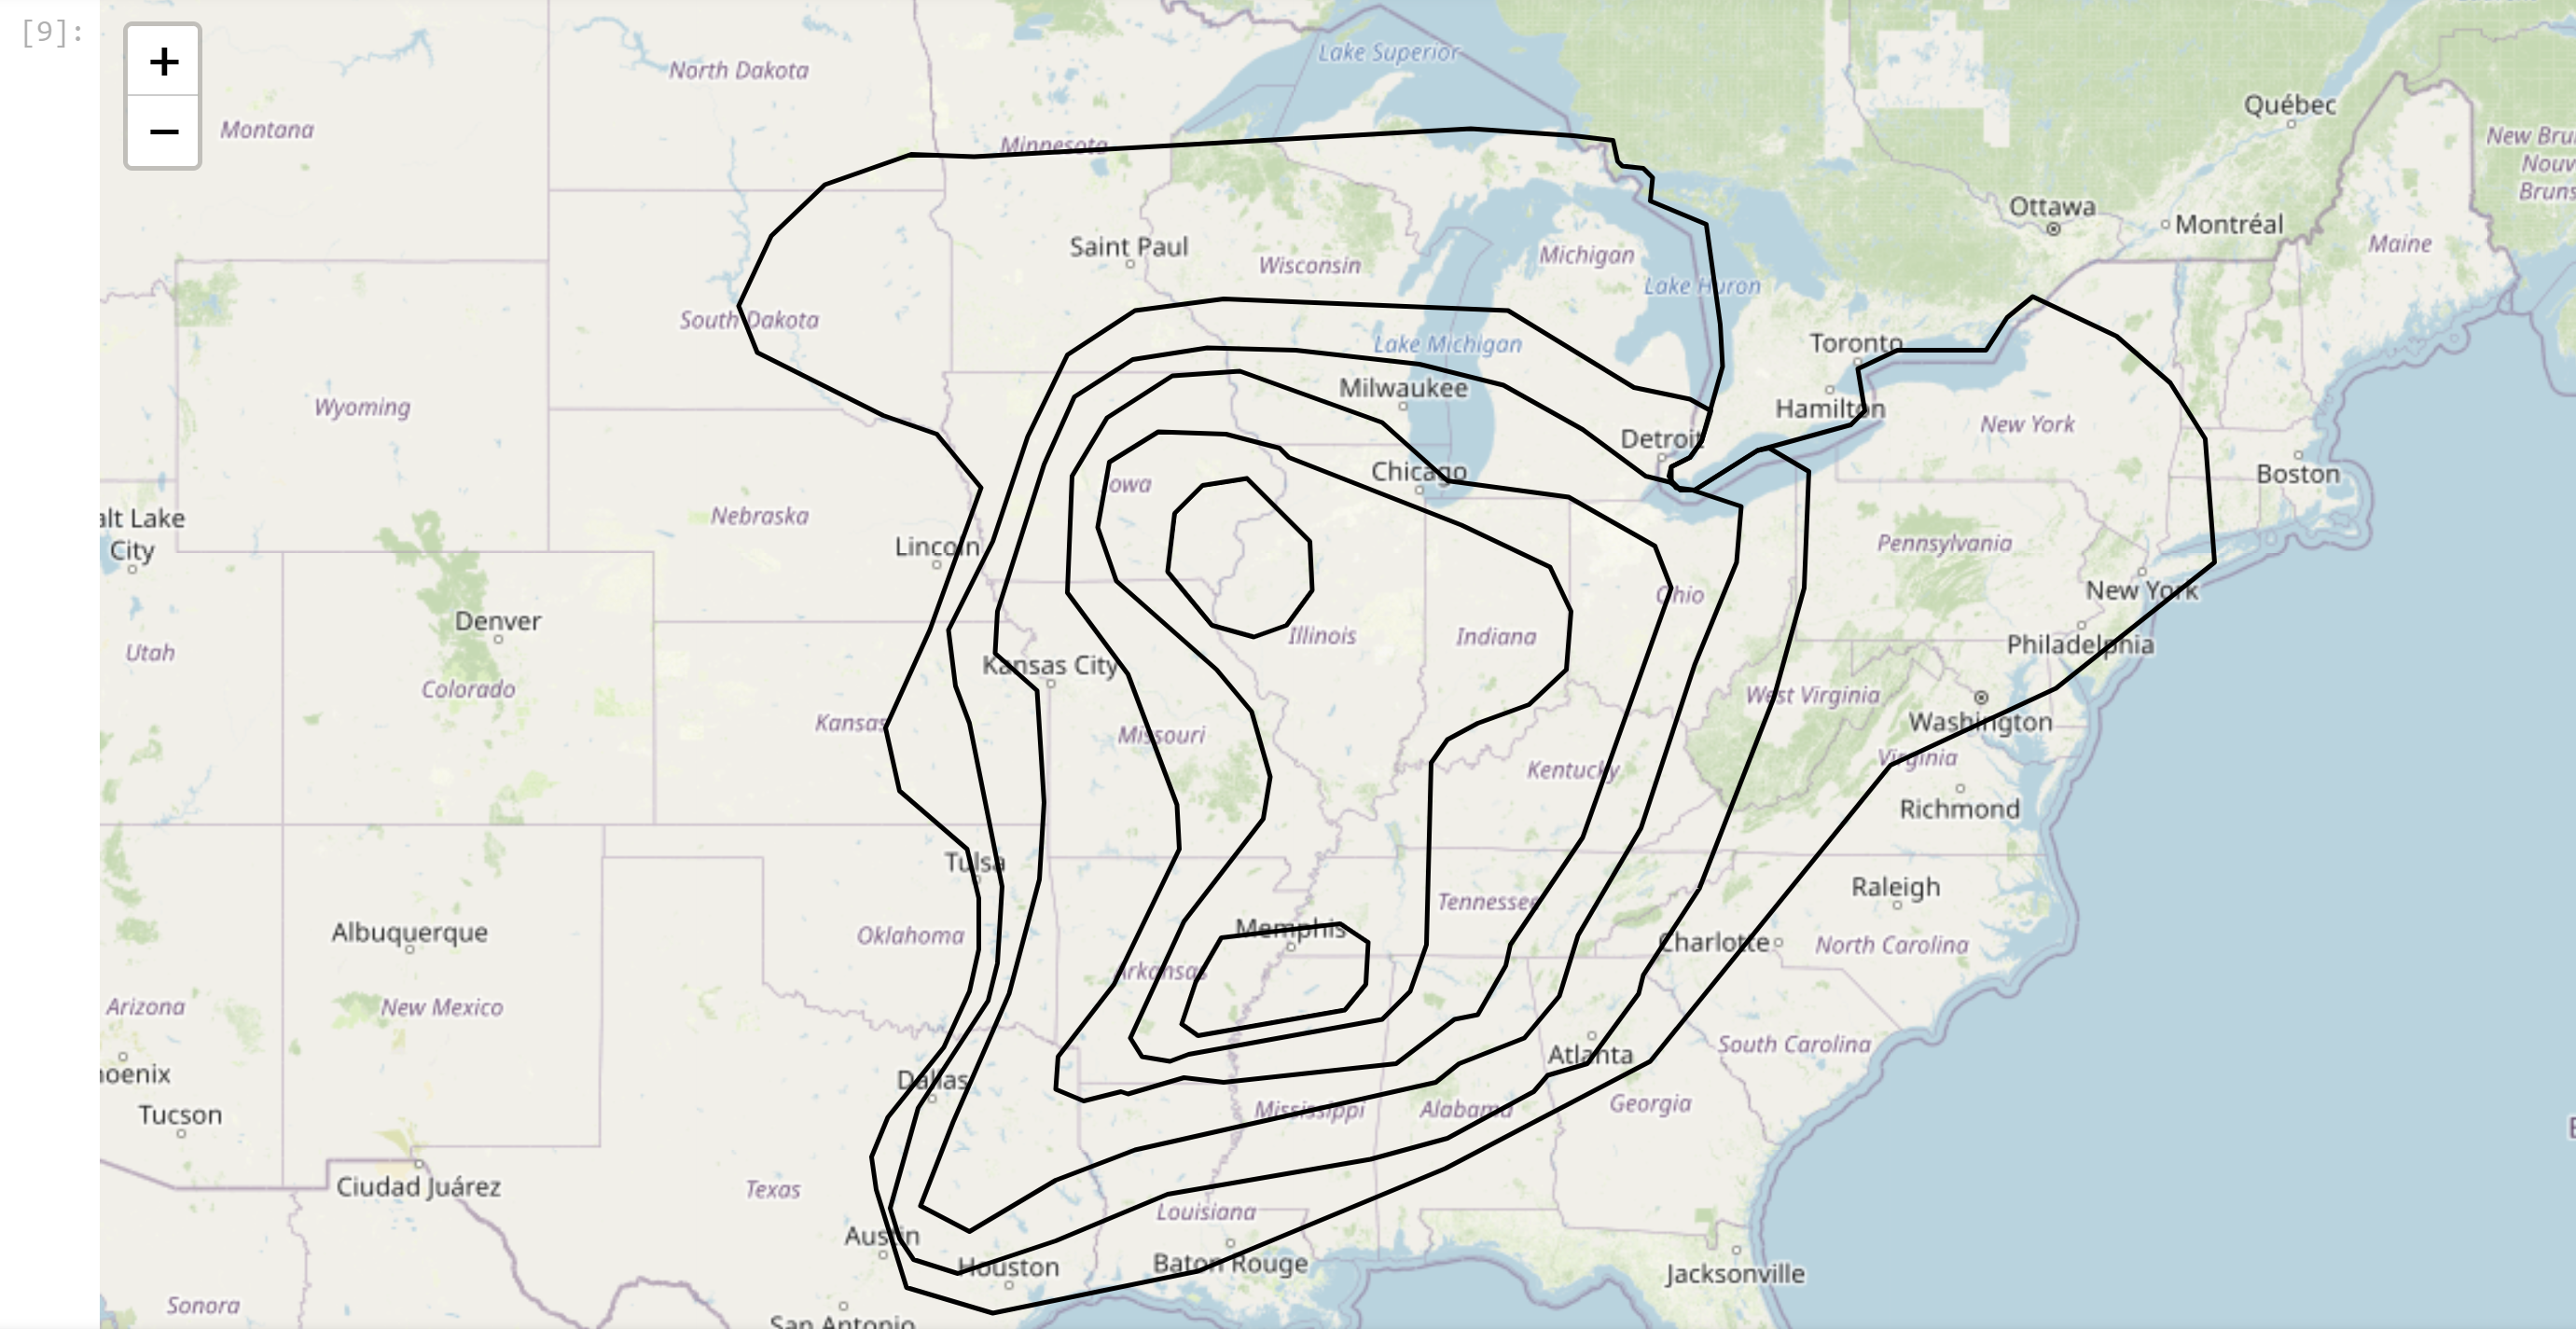

## Example Day 2 WPC Outlook from December 15, 2023

In [10]:
# Load the WPC GeoJSON file
wpc_json= main_path + '/geojson/Day2_Latest.geojson'
gdf = gpd.read_file(wpc_json)

In [11]:
# Inspecting the unique values in the 'OUTLOOK' column to understand the category labels
unique_categories = gdf['OUTLOOK'].unique()
unique_categories.tolist()

['Marginal (At Least 5%)', 'Slight (At Least 15%)']

<Figure size 1500x1000 with 0 Axes>

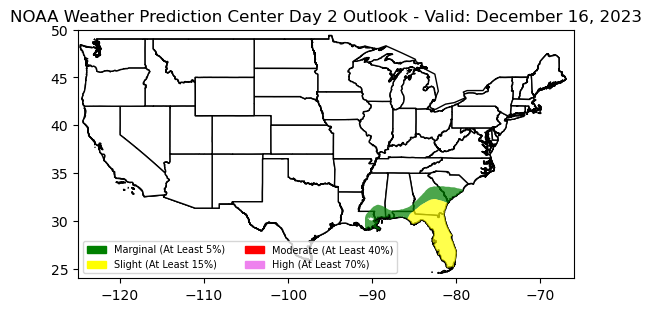

In [12]:
# Define a color map for the categories with labels from the data
category_colors = {
    'Marginal (At Least 5%)': 'green',      
    'Slight (At Least 15%)': 'yellow',      
    'Moderate (At Least 40%)': 'red',       
    'High (At Least 70%)': 'violet'           
}

# Plot the US map focusing on CONUS
plt.figure(figsize=(15, 10))
ax = usa.plot(color='white', edgecolor='black')

# Set the limits to focus on the contiguous US
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot the states
states_gdf.plot(ax=ax, color='white', edgecolor='black')

# Filter the GeoDataFrame for CONUS
gdf_conus = gdf.cx[minx:maxx, miny:maxy]

# Plot the states
states_gdf.plot(ax=ax, color='white', edgecolor='black')

# Set transparency level
alpha_level = 0.7  # Adjust this value as needed

# Plot each category with the defined color
for category in unique_categories:
    gdf_cat = gdf_conus[gdf_conus['OUTLOOK'] == category]
    gdf_cat.plot(ax=ax, color=category_colors[category], alpha=alpha_level, label=category)

# Set plot title and legend
plt.title('NOAA Weather Prediction Center Day 2 Outlook - Valid: December 16, 2023')

patchList = []
for key in category_colors:
        data_key = mpatches.Patch(color=category_colors[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, loc = 'lower left', ncol=2, prop = { "size": 7 })
plt.show()

### Interactive Excessive Rainfall Outlook

In [13]:
# Convert all Timestamp columns to string
for col in gdf.columns:
    if pd.api.types.is_datetime64_any_dtype(gdf[col]):
        gdf[col] = gdf[col].dt.strftime('%Y-%m-%d %H:%M:%S')

# Transform to a projected CRS (e.g., UTM)
gdf_projected = gdf.to_crs('epsg:3785')  

# Calculate the area in square meters
gdf_projected["area"] = gdf_projected.area
gdf_projected.explore("area", legend=False,
            style_kwds={'fillColor': 'none',  # No fill color
                        'color': 'black'})    # Outline color

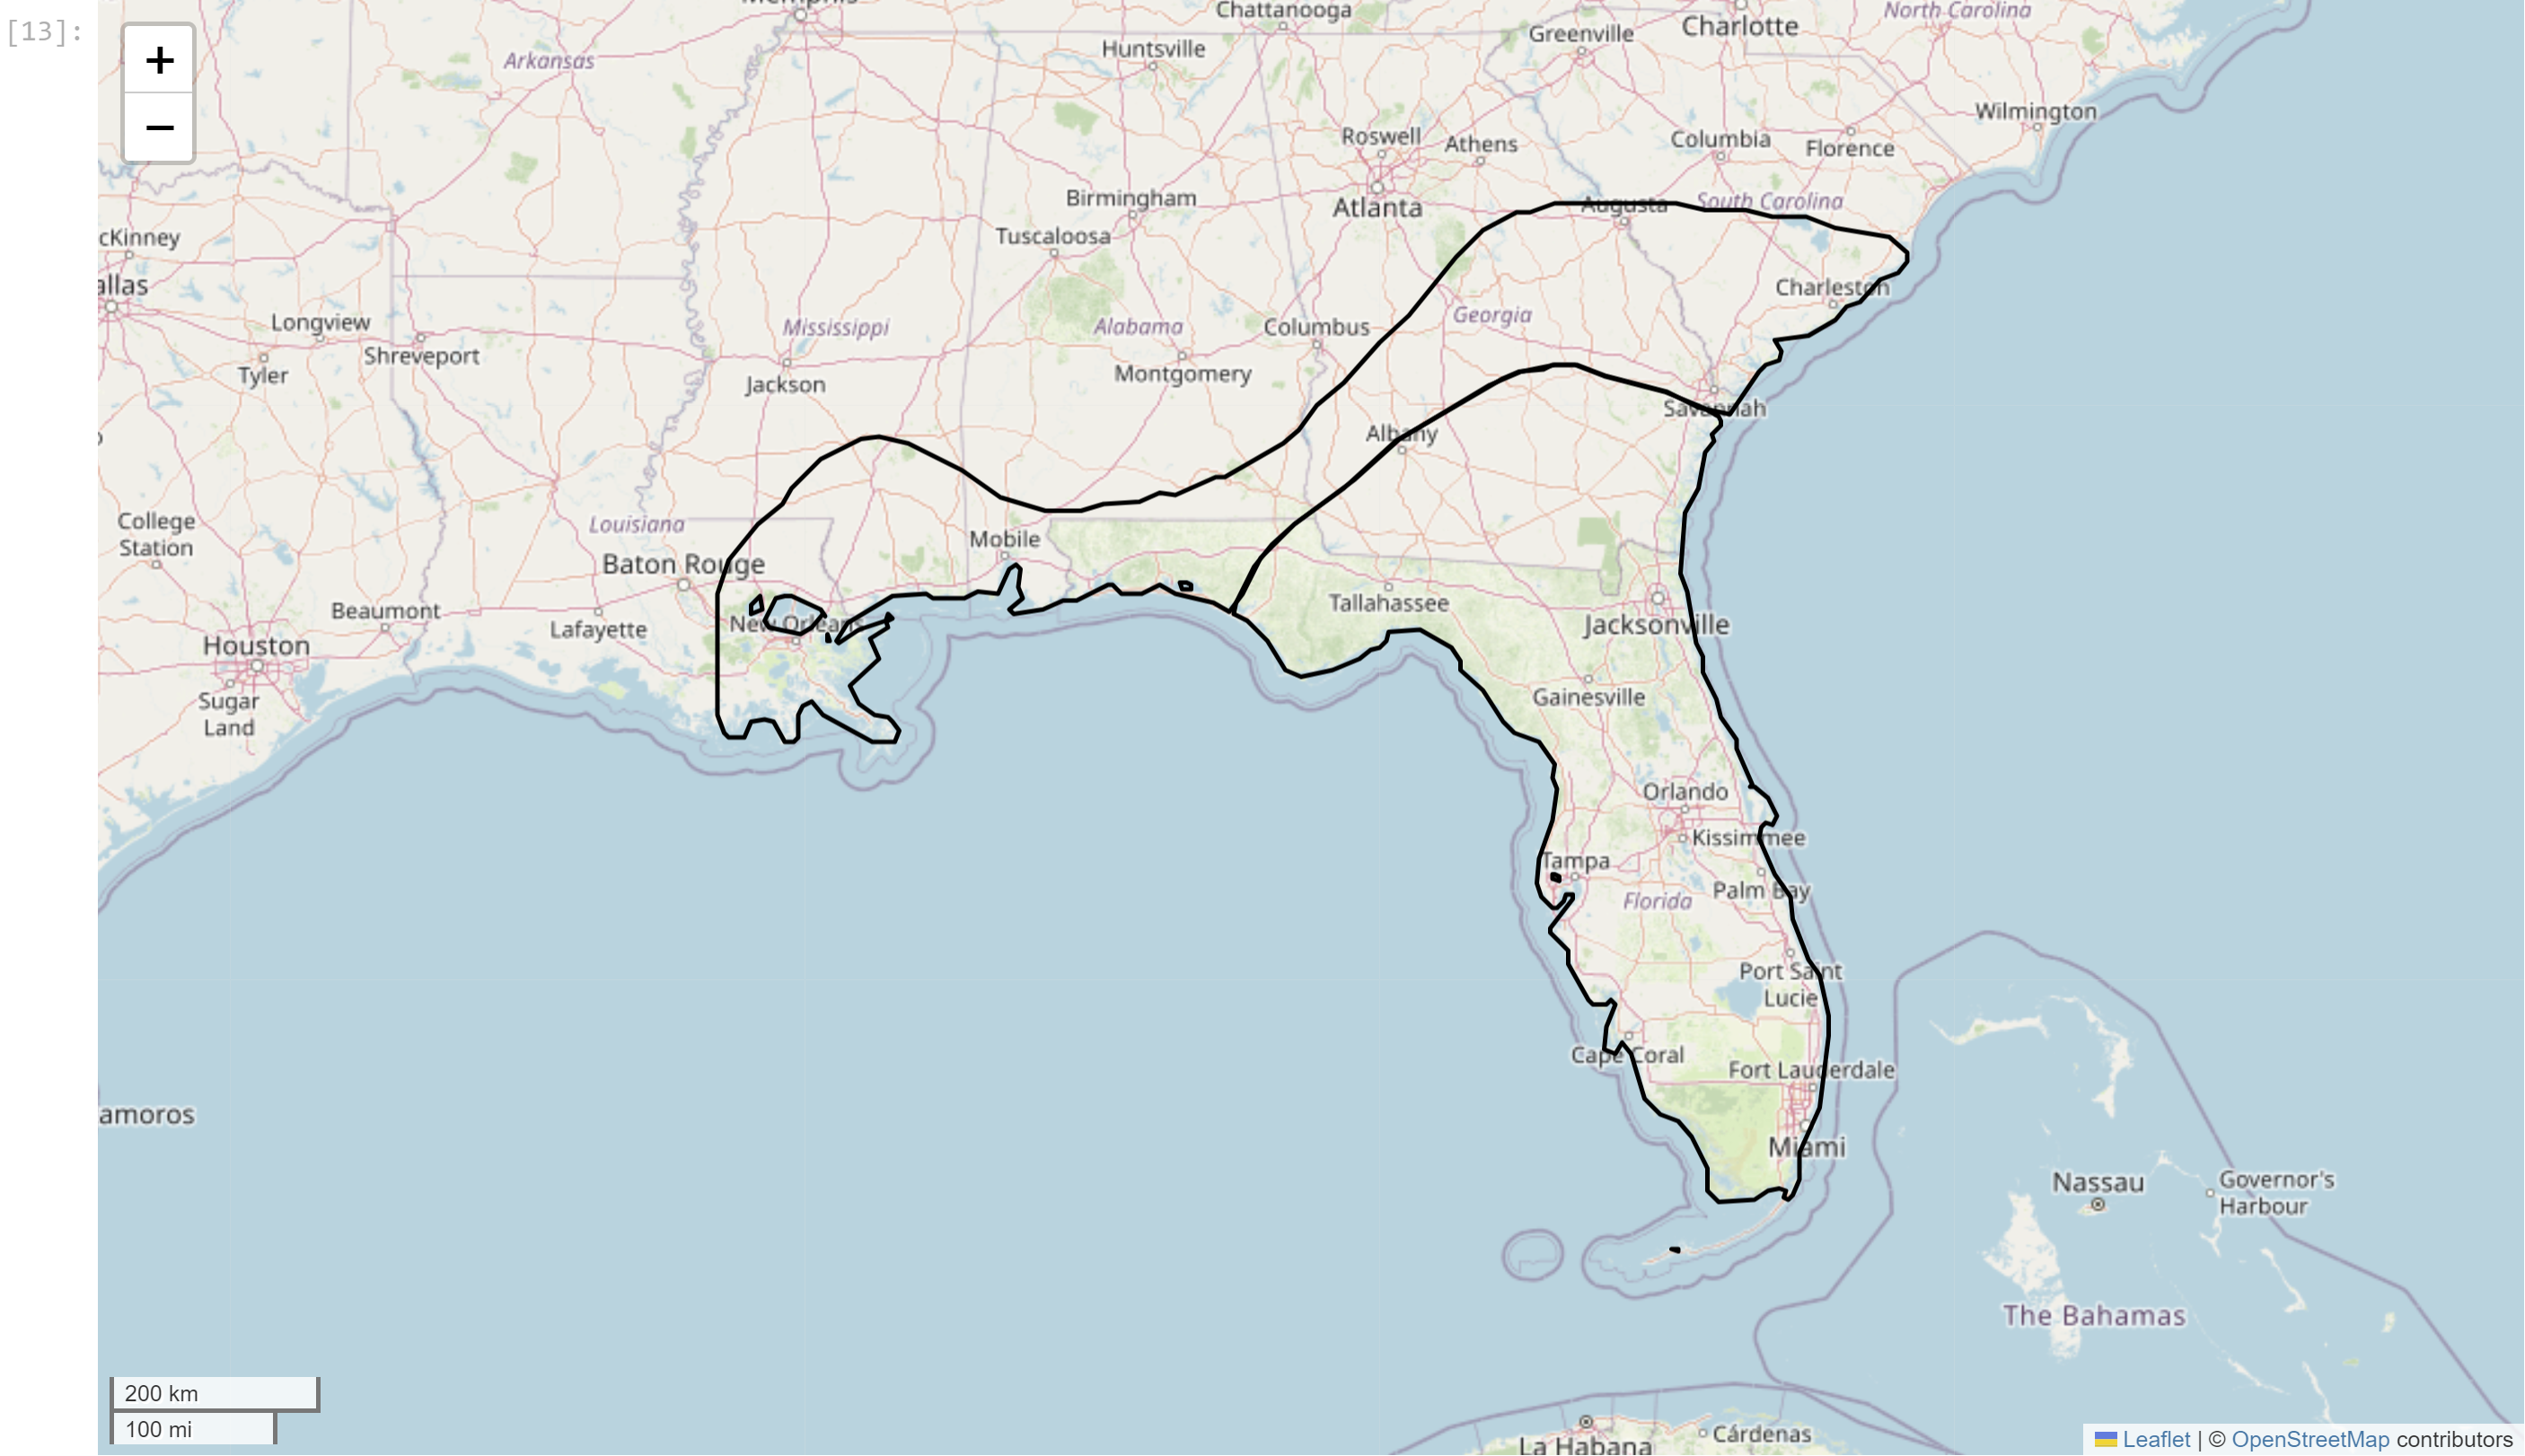

### National Weather Service Radar Loop December 16, 2023 2200Z

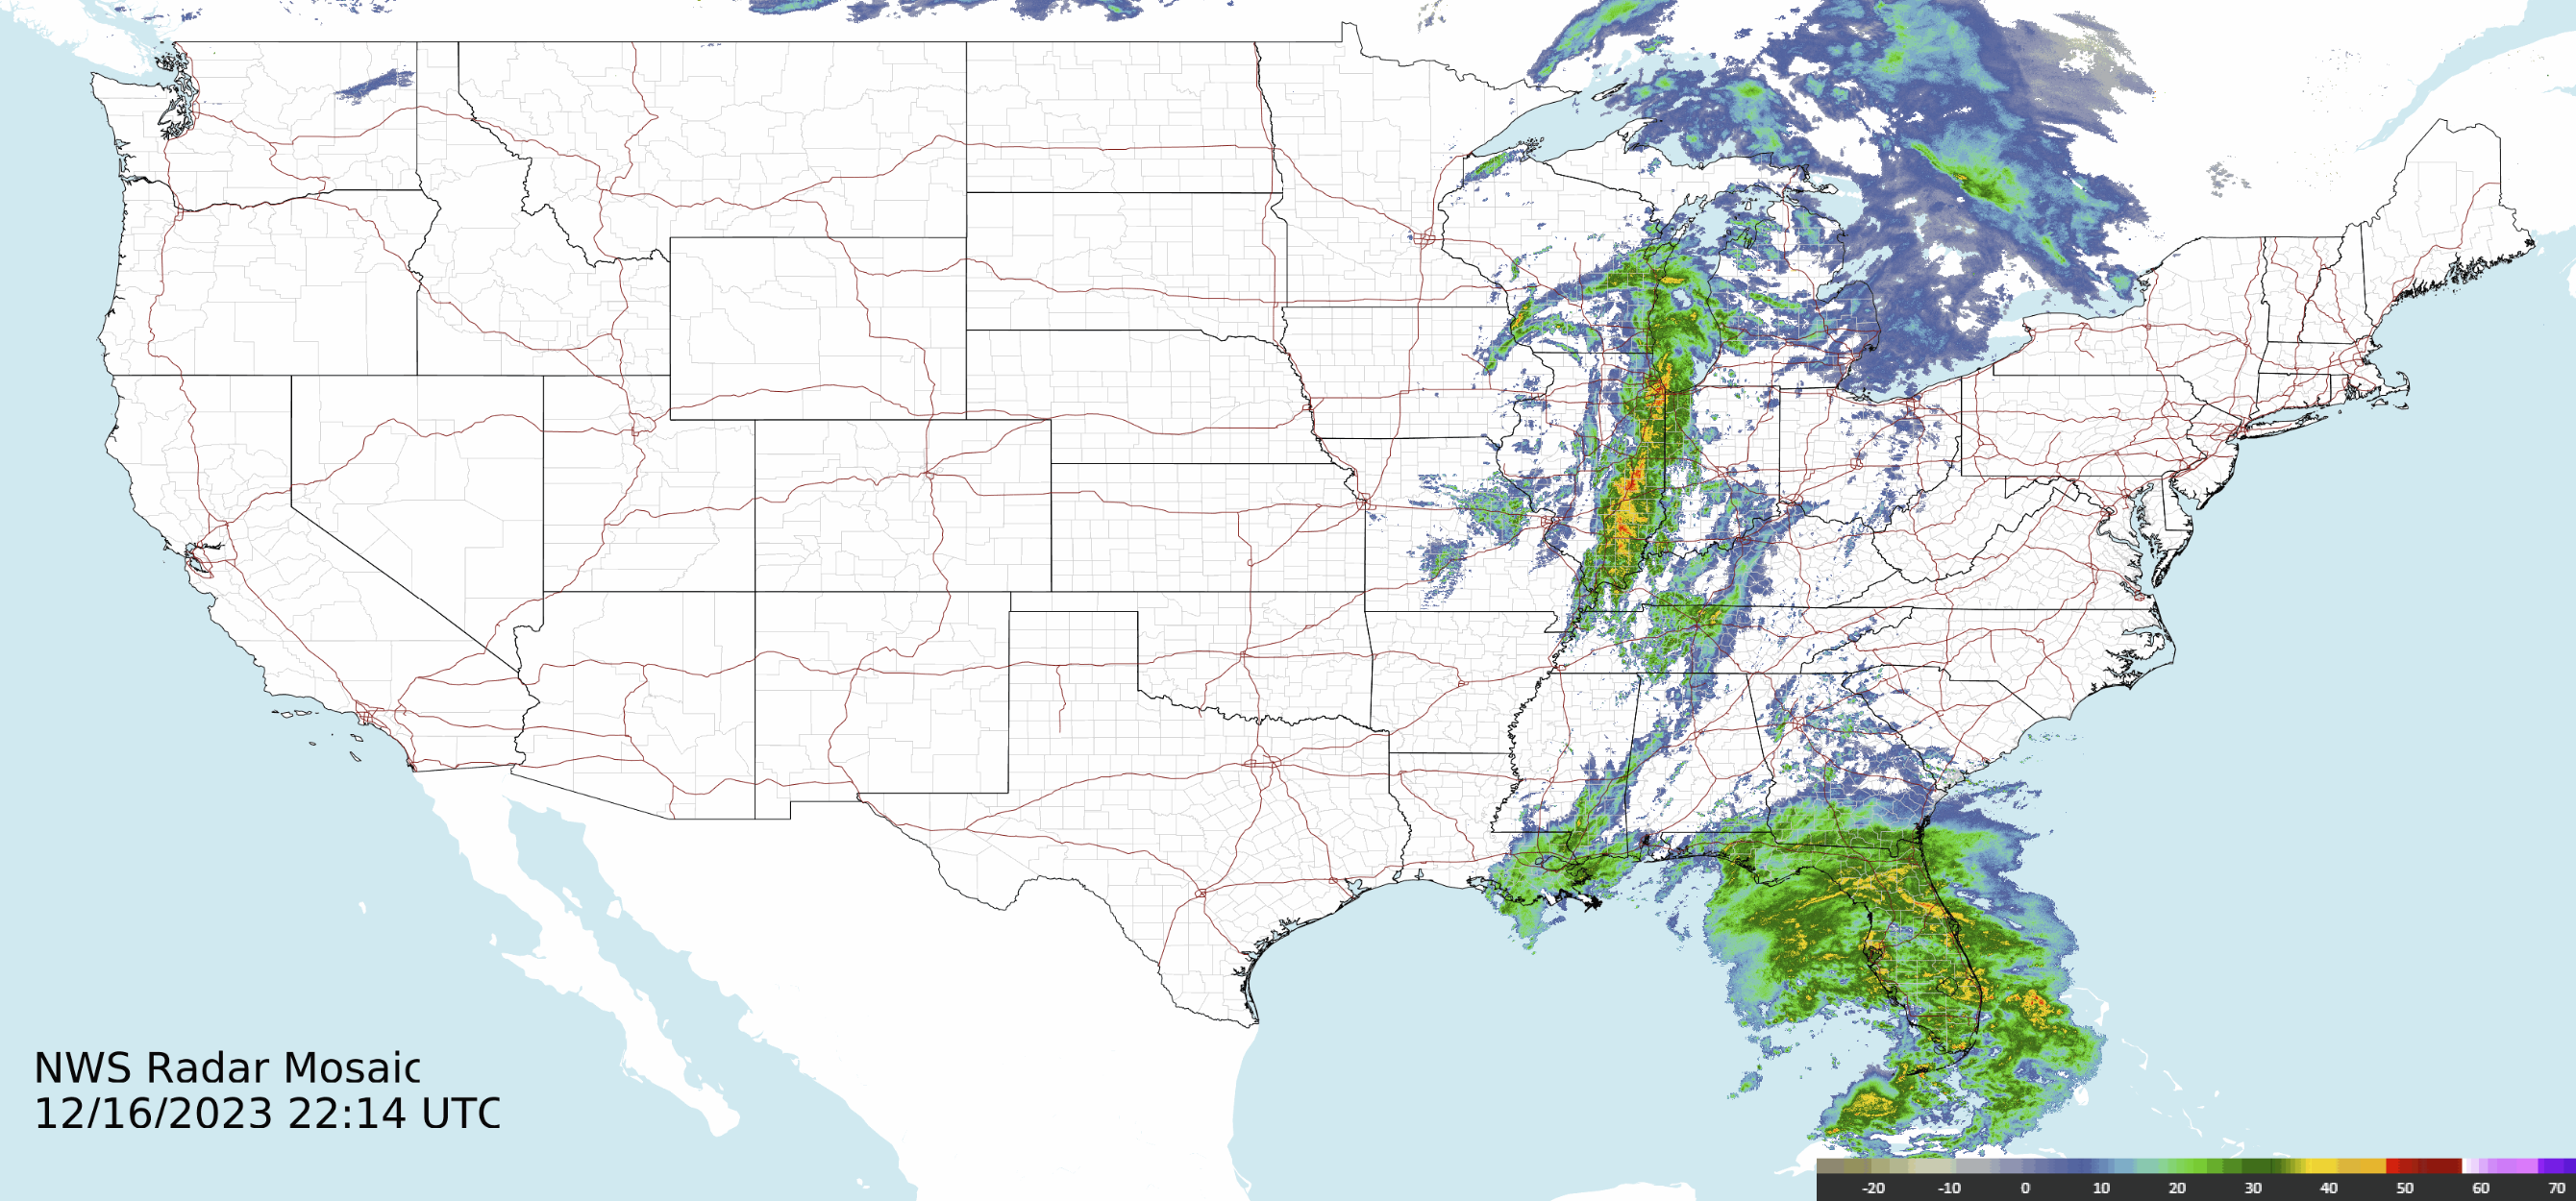